<a href="https://colab.research.google.com/github/XavierCarrera/machine-learning/blob/master/Machine_Learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torchvision import  utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

# Pre-Trained Models

In [3]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


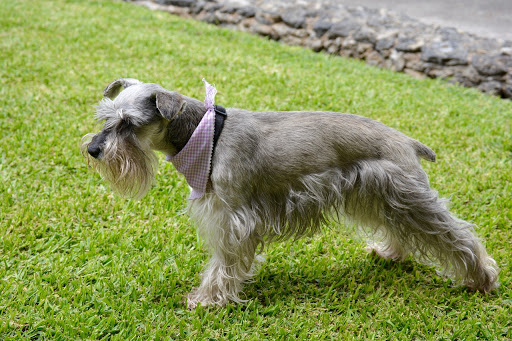

In [34]:
url = "https://lh3.googleusercontent.com/proxy/8-m3JNGLDKIXuhskEX23kl2MeAAl3QfsH1m4XB7pkW6Dfe0_FI8_oA2kv9gi7EX3nfoAR7hU-OOKO5Cpg2UWYJGy-eogZ7Jo6JRkOarYAOVtHkRwUhzWlbOxIbwdxtorrMnNiT6_zn4vbsJaSWdPdw"
image = request.urlretrieve(url, "test.jpg")
img = Image.open(image[0])
img

In [35]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.485, 0.456, 0.406],
        std = [0.229, 0.224, 0-225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


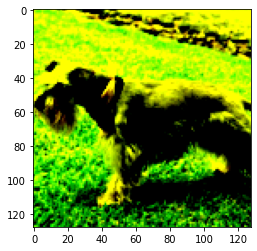

In [36]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [37]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [38]:
out = inception(batch)
out

tensor([[ 1.5249e+00,  6.8209e-01,  2.9199e+00,  5.6005e+00, -2.0052e+00,
          4.3849e+00,  5.7396e+00,  4.9345e-01, -9.7639e-01, -1.7919e+00,
         -5.5991e+00, -2.0318e+00, -3.3923e+00, -2.4717e+00, -7.2386e+00,
          5.1526e-01, -2.2477e+00, -4.3268e+00, -4.8664e+00, -1.9746e+00,
         -3.2493e+00, -7.9391e+00,  1.7469e+00, -5.5461e+00, -1.7048e+00,
         -3.4861e+00, -8.4127e-01,  3.2894e+00, -4.6408e+00,  6.8939e-01,
         -3.7607e-01, -7.2272e-01, -2.7190e+00,  6.0735e+00, -1.6161e+00,
          6.6294e+00,  3.0702e+00,  1.8887e+00,  2.4970e+00, -5.6718e-01,
         -5.7331e-01, -1.2826e-01,  2.0926e+00,  1.3118e+00,  8.4431e-01,
         -2.1897e+00, -3.9781e+00, -1.6688e+00,  1.5742e+00, -6.0445e+00,
         -3.6508e+00,  7.4724e+00, -1.8085e+00, -6.1809e-01, -3.8236e+00,
         -4.8924e+00, -5.8047e+00,  7.2590e-01, -3.8790e+00, -7.7526e+00,
         -3.5946e+00,  1.3494e+00, -2.8011e+00,  3.0764e+00,  2.4180e+00,
         -7.6149e+00, -3.6888e+00,  1.

In [39]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [40]:
_, index = torch.max(out, 1)

In [41]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Airedale, Airedale terrier', 54.0614128112793)

In [42]:
_, index = torch.sort(out, descending=True)

top_five = index[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Airedale, Airedale terrier 54.0614128112793
miniature schnauzer 40.415977478027344
Irish terrier 4.179237365722656
Sealyham terrier, Sealyham 1.0761356353759766
standard schnauzer 0.07319130748510361
